# EDA on CA EnviroScan 3
> modified from David's original EDA for EnviroScreen4

4/14/22

GG 

---
4/10:
check:  
Emergency Department and Patient Discharge Datasets from the
State of California, Office of Statewide Health Planning and
Development (OSHPD)

---

This is an initial scan over the data included in the California Office of Environmental Health Hazard Assessment [EnviroScan 3.0 report](https://oehha.ca.gov/calenviroscreen/report/calenviroscreen-40), released in 2021.

The data is accompanied by a [data dictionary](../enviroscreen_info/CAES4/calenviroscreen40resultsdatadictionary_F_2021.pdf) with explanations for each of the columns. This data dictionary is also a sheet in the Excel data file.

The data file includes a third sheet with demographic information for each region.

Giovanna Guevara and Marshall Cyrus are each looking over the CA EnviroScans 2 and 3. These came as CSV files, without the extra sheets included in the Excel file.

# Import libraries

In [197]:
# general
import os
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [199]:
plt.style.use('dark_background')
plt.style.use('tableau-colorblind10')

# Import data

In [200]:
# list raw data files
data_folder = '../raw_data/'
raw_data_files = os.listdir(data_folder)
raw_data_files

['amazon.csv',
 'info.txt',
 'calenviroscreen-3.0-results-june-2018-update.csv',
 'calenviroscreen2-final-report.csv',
 'calenviroscreen40resultsdatadictionary_F_2021.xlsx',
 'links',
 'calenviroscreendatav11.xls']

In [201]:
#import the enviroscan 4 excel data
ca3_file_path = '../raw_data/calenviroscreen-3.0-results-june-2018-update.csv'
#dfca4 = pd.read_excel(ca3_file_path)
dfca4 = pd.read_csv(ca3_file_path)

In [202]:
#The data takes a few seconds to read, but is only a few MB after being interpreted.
# consider saving a csv copy from the dataframe later.

In [203]:
#look at the top.
dfca4.head()

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,SB 535 Disadvantaged Community,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,3174,Fresno,93706,Fresno,-119.781696,36.709695,94.09,100.00,95-100% (highest scores),Yes,0.065,98.18,15.40,97.22,48.524,95.54,681.20,80.92,2.75,47.82,18551.957190,97.46,909.14,62.98,80.5,98.67,45.75,89.85,0.795,84.32,0,0.00,21.75,97.81,79.96,9.85,99.95,131.64,97.67,7.44,93.84,14.13,96.31,53.3,95.76,16.2,77.51,76.3,97.12,17.6,91.72,26.0,79.40,92.12,9.55,99.70
1,6071001600,6133,San Bernardino,91761,Ontario,-117.618013,34.057780,90.68,99.99,95-100% (highest scores),Yes,0.062,91.10,13.31,93.64,38.556,92.12,904.66,96.11,1.37,41.34,7494.236622,89.05,782.26,55.66,66.2,97.68,36.00,85.57,1.250,88.77,5,55.01,12.00,92.17,81.19,10.00,100.00,60.66,69.78,7.04,90.85,12.94,92.66,53.3,95.76,33.4,96.25,72.5,94.63,12.3,71.82,34.1,93.75,87.44,9.07,98.11
2,6019000200,3167,Fresno,93706,Fresno,-119.805504,36.735491,85.97,99.97,95-100% (highest scores),Yes,0.062,91.10,15.40,97.22,47.445,95.42,681.20,80.92,3.03,48.75,12454.948410,95.42,576.52,39.00,22.0,85.13,30.25,81.93,0.200,60.50,0,0.00,2.50,57.18,71.16,8.76,99.00,142.12,98.33,10.16,99.78,14.96,97.67,42.3,89.06,16.7,78.39,86.8,99.56,16.1,87.98,40.1,97.85,94.58,9.81,99.99
3,6077000801,6692,San Joaquin,95203,Stockton,-121.314524,37.940517,82.49,99.96,95-100% (highest scores),Yes,0.046,53.02,12.54,84.02,24.117,73.52,278.76,29.11,12.93,60.56,2387.782922,69.97,1305.01,78.29,50.1,96.10,132.10,98.41,0.795,84.32,19,98.63,27.00,99.10,74.48,9.17,99.59,142.17,98.34,6.23,80.65,14.72,97.17,40.8,87.52,15.3,75.14,61.3,85.57,19.6,94.97,21.1,63.54,86.70,8.99,97.72
4,6019001500,2206,Fresno,93725,Fresno,-119.717843,36.681600,82.03,99.95,95-100% (highest scores),Yes,0.065,98.18,15.40,97.22,18.846,58.22,1000.24,98.64,3518.41,95.15,21790.706720,98.15,435.16,24.30,60.0,97.15,54.20,92.09,13.100,99.70,0,0.00,50.80,99.91,80.20,9.88,99.99,90.48,89.54,4.50,38.92,12.82,92.36,45.1,91.13,14.7,73.72,66.4,90.23,18.6,93.65,28.1,83.98,80.08,8.30,92.76


In [204]:
# to view all columns and names 
pd.options.display.max_columns = 90
pd.options.display.max_rows = 100

### Column list

In [205]:
dfca4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Census Tract                                      8035 non-null   int64  
 1   Total Population                                  8035 non-null   int64  
 2   California County                                 8035 non-null   object 
 3   ZIP                                               8035 non-null   int64  
 4   Nearby City 
(to help approximate location only)  8035 non-null   object 
 5   Longitude                                         8035 non-null   float64
 6   Latitude                                          8035 non-null   float64
 7   CES 3.0 Score                                     7929 non-null   float64
 8    CES 3.0 Percentile                               7929 non-null   float64
 9   CES 3.0 
Percentile

The data includes 58 columns, mostly as numerical types.
The three that aren't numerical include locations `California County` and `Approximate Location`. The third `object` type is `CES 4.0 Percentile Range`. This gives a range of numbers that likely can be turned into a numerical. We'll deal with that as it comes.

---
---
# Column Detail

---
## 0 Census Tract

In [206]:
col = 'ZIP'
dfca4[col].describe()

count     8035.000000
mean     92836.574611
std       3445.177594
min         32.000000
25%      91602.000000
50%      92691.000000
75%      94558.000000
max      96161.000000
Name: ZIP, dtype: float64

Text(0.5, 1.0, 'ZIP histogram')

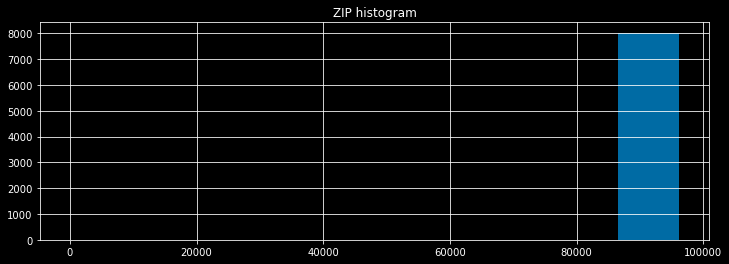

In [207]:
dfca4[col].hist( figsize = (12,4))
plt.title(col + ' histogram')

In [208]:
len(dfca4)

8035

In [209]:
len(dfca4[col].unique())

1355

The number of unique values is the same as the number of observations. Each has its own unique census identifier --- these may be used as indices for the data, but I will wait to see if there's any pattern.

### Q:
    - Do these census regions cover every portion of California?
    - How are they chosen? Are they approximately population organized?
    - Are these regions the same set as those in the other CAES data sets? Were there any changes to them from year to year?

---
##  1   Total Population 

Thanks to [the docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) for help with series.hist(). The `log` parameter is passed to `matplotlib.pyplot.hist()`.

In [210]:
col = 'Total Population'
dfca4[col].describe()

count     8035.000000
mean      4636.459988
std       1972.587602
min          0.000000
25%       3358.000000
50%       4413.000000
75%       5656.500000
max      37452.000000
Name: Total Population, dtype: float64

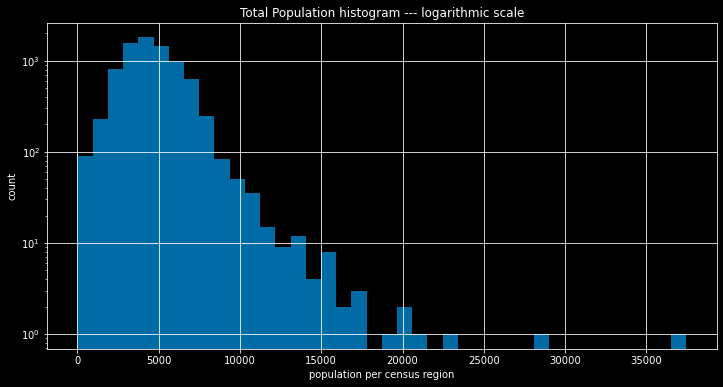

In [211]:
#distribution
dfca4[col].hist(bins=40, log = True, figsize = (12,6));
plt.title(col + ' histogram --- logarithmic scale');
plt.xlabel("population per census region");
plt.ylabel('count');

The population is skewed to higher values, with thousands of small populated areas and only a handful of very heavily populated ones.

None of these populations are "big city" levels, though. The very largest and sprawling areas must be broken into neighborhoods.

### Q:
    - What are the populations measuring? The census number may be a specifically designated region.

## 2 - California County

In [212]:
col = 'California County'
dfca4[col].describe()

count            8035
unique             58
top       Los Angeles
freq             2343
Name: California County, dtype: object

It looks like over a quarter of these regions come from Los Angeles county. It's a big one. There are 58 unique counties.

### Q:
    - is every portion of california's land represented here?
    - is every county represented?
    

## 3   ZIP 

In [213]:
col = 'ZIP'
dfca4[col].describe()

count     8035.000000
mean     92836.574611
std       3445.177594
min         32.000000
25%      91602.000000
50%      92691.000000
75%      94558.000000
max      96161.000000
Name: ZIP, dtype: float64

In [214]:
len(dfca4[col].unique())

1355

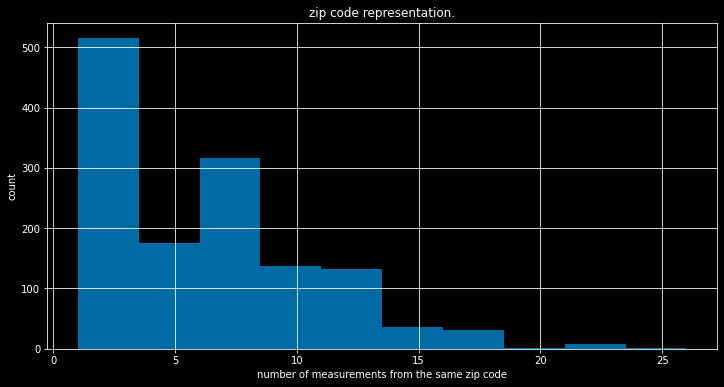

In [215]:
dfca4[col].value_counts().hist(figsize = (12,6))
plt.xlabel("number of measurements from the same zip code")
plt.ylabel("count")
plt.title("zip code representation.");

These are zip codes. There are definitely multiple measurements per zip code --- only 1355 unique values. There is one for each region, but at least one is surely wrong... there is a 32. Is this is something like 00032?

In [216]:
dfca4.loc[dfca4[col] < 10000]

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,SB 535 Disadvantaged Community,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
4857,6109004200,3954,Tuolumne,40,Yosemite NTL Park,-119.640723,37.949499,20.15,38.74,35-40%,No,0.057,82.10,5.261811,2.54,0.092,0.20,414.34,43.21,0.03,13.57,0.001640,0.21,106.87,1.44,4.0,39.00,22.0,73.68,0.0,0.0,1,15.26,19.75,97.24,28.66,3.53,16.66,39.93,41.90,6.73,87.71,11.68,86.83,10.3,40.31,0.0,0.00,35.5,53.16,14.1,80.71,10.7,15.45,55.04,5.71,57.49
5392,6033000100,3121,Lake,48,Mendocino NTL Forest,-122.909601,39.335491,17.60,32.00,30-35%,No,0.040,25.87,3.631204,0.10,0.350,1.22,376.66,38.95,16.09,62.47,1.730618,5.74,76.43,0.55,6.0,48.25,14.0,58.54,0.0,0.0,5,55.01,8.00,85.57,29.34,3.61,18.16,34.77,33.00,3.59,17.98,7.17,39.63,21.0,63.83,0.8,4.29,56.0,80.11,19.9,95.33,24.4,75.01,46.96,4.87,45.57
5408,6083001800,1245,Santa Barbara,32,Los Padres NTL Forest,-119.717740,34.777648,17.54,31.79,30-35%,No,0.042,31.84,6.321459,7.87,0.125,0.35,869.85,93.93,457.83,85.01,3.866229,6.45,117.14,1.83,0.0,0.00,24.0,75.97,0.0,0.0,7,71.61,10.00,89.46,37.45,4.61,38.44,27.59,20.62,3.12,10.51,5.72,20.20,26.0,71.47,12.1,66.35,45.5,67.66,7.3,32.10,16.7,43.59,36.67,3.80,29.74
6617,6093001200,1409,Siskiyou,35,Modoc Shasta Klamath for,-121.826057,41.411603,11.62,16.55,15-20%,No,0.044,40.49,4.875607,1.97,0.120,0.31,242.19,24.41,0.77,36.81,0.084300,2.39,87.54,0.89,0.0,0.00,8.0,42.85,0.0,0.0,0,0.00,8.00,85.57,18.78,2.31,2.28,30.62,26.23,NaN,NaN,10.97,82.43,8.4,33.76,0.5,1.63,39.1,58.16,14.0,80.26,15.8,39.08,48.46,5.03,47.71
6859,6017030603,3566,El Dorado,51,Eldorado NTL Forest,-120.422095,38.882147,10.09,13.49,10-15%,No,0.053,73.93,6.283598,7.82,0.199,0.57,358.81,37.40,3.86,50.69,0.478780,4.04,154.73,3.48,0.0,0.00,2.0,13.52,0.0,0.0,2,29.25,6.65,80.41,25.16,3.10,10.02,31.76,28.28,3.50,16.46,6.55,31.12,5.4,21.30,0.0,0.00,31.0,46.35,10.2,57.71,20.7,62.07,31.38,3.25,21.94
7149,6105000400,975,Trinity,39,Southeast Trinity County,-123.210947,40.069602,8.57,9.84,5-10%,No,0.040,25.87,5.929554,4.80,0.074,0.14,44.23,0.16,0.00,0.00,0.000004,0.01,24.75,0.04,0.0,0.00,12.6,55.35,0.0,0.0,4,48.80,9.00,87.43,15.73,1.94,0.73,34.25,31.93,NaN,NaN,7.74,47.34,6.4,25.49,NaN,NaN,51.2,74.63,NaN,NaN,15.4,36.94,42.66,4.42,38.59
8033,6083980100,11,Santa Barbara,57,Channel Islands,-120.048221,33.948186,NaN,NaN,NaN,No,0.040,25.87,9.536303,40.92,0.158,0.44,NaN,NaN,0.00,0.00,4.891769,6.86,NaN,NaN,0.0,0.00,3.0,21.88,0.0,0.0,0,0.00,0.00,0.00,11.34,1.40,0.15,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8034,6111980000,56,Ventura,61,Channel Is Air Guard Station,-119.503588,33.255655,NaN,NaN,NaN,No,0.042,31.84,NaN,NaN,0.343,1.17,47.33,0.32,0.00,0.00,0.096345,2.48,NaN,NaN,5.4,45.46,0.0,0.00,0.0,0.0,0,0.00,0.50,20.49,9.17,1.13,0.02,0.00,0.00,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 8 entries with goofball zips.

These are all "unincorporated" areas. It looks like these are common:

[LACounty.gov Unincorporated Areas](https://lacounty.gov/government/about-la-county/unincorporated-areas/)

[PolicyLink California Unincorporated: Mapping Disadvantaged Communities in the San Joaquin Valley(PDF report)](https://www.policylink.org/sites/default/files/CA%20UNINCORPORATED_FINAL.pdf)

[ZocaloPublicSquare](https://www.zocalopublicsquare.org/2020/11/10/california-unincorporated-communities-covid19-pandemic/ideas/connecting-california/)

## Q:
    - are these unincorporated "zips" real values that are used by the state? Do they mean anything?
    - How many times are certain zip codes represented?
    - Are there other "unincorporated areas"?
    

## 4    Approximate Location     

In [217]:
# col = 'Approximate Location'
# dfca4[col].describe()

In [218]:
# dfca4[col].value_counts().hist(bins = 100, log = True, figsize = (12,6))
# plt.xlabel("number of representations per approximate location")
# plt.title("Approximate Location representation --- log scale");
# plt.ylabel('count');

A lot from LA again. That's the lone 900+. No NaNs. This is basically a "city" stand-in, which accounts for all the places that aren't really cities. The data dictionary stresses that this is for "reference purposes only." What is a reference purpose?

## Q:
    - 

## 5 Latitude and 6 Longitude
There shouldn't be too many surprises here. Check for nans and goofballs. Perhaps an opportunity to practice with [matplotlib](https://matplotlib.org/basemap/users/examples.html).

The data dictionary gives each of these as a latitude and longitude of the _centroid_ of the tract. For disconnected and concave shapes, it is possible for this centroid to lie outside of the border.

In [219]:
dfca4['Latitude'].describe()

count    8035.000000
mean       35.495893
std         2.086016
min        32.547376
25%        33.924145
50%        34.206624
75%        37.634021
max        41.946648
Name: Latitude, dtype: float64

In [220]:
dfca4['Longitude'].describe()

count    8035.000000
mean     -119.409318
std         1.976336
min      -124.297889
25%      -121.518410
50%      -118.429194
75%      -117.924814
max      -114.306484
Name: Longitude, dtype: float64

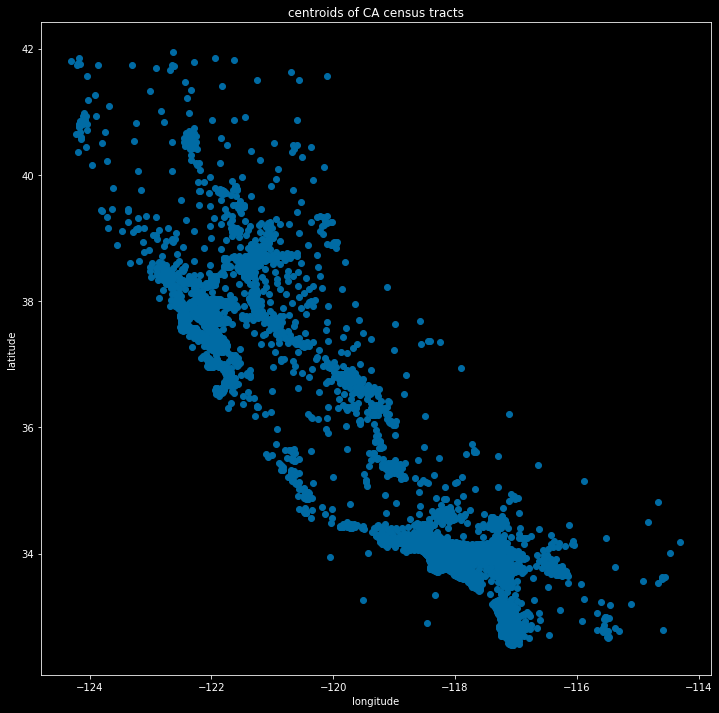

In [221]:
lat = dfca4['Latitude']
lon = dfca4['Longitude']
#plot these bad boys
plt.figure(figsize = (12,12))
plt.scatter(lon, lat)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('centroids of CA census tracts');

Hey! That's California. It even looks like an elevation / population map, with measurements largely avoiding mountainous areas. I'm sure this is primarily a reflection of the distribution of 2010 census areas.

## plotting census tracts

Shapefiles for the California census tracts, defined in 2010, were obtained from [catalog.data.gov](https://catalog.data.gov/dataset/tiger-line-shapefile-2019-state-california-current-census-tract-state-based). The site has this to say about the tracts and their codes:
> Census tracts are small, relatively permanent statistical subdivisions of a county or equivalent entity, and were defined by local participants as part of the 2010 Census Participant Statistical Areas Program. The Census Bureau delineated the census tracts in situations where no local participant existed or where all the potential participants declined to participate. The primary purpose of census tracts is to provide a stable set of geographic units for the presentation of census data and comparison back to previous decennial censuses. Census tracts generally have a population size between 1,200 and 8,000 people, with an optimum size of 4,000 people. When first delineated, census tracts were designed to be homogeneous with respect to population characteristics, economic status, and living conditions. The spatial size of census tracts varies widely depending on the density of settlement. Physical changes in street patterns caused by highway construction, new development, and so forth, may require boundary revisions. In addition, census tracts occasionally are split due to population growth, or combined as a result of substantial population decline. Census tract boundaries generally follow visible and identifiable features. They may follow legal boundaries such as minor civil division (MCD) or incorporated place boundaries in some States and situations to allow for census tract-to-governmental unit relationships where the governmental boundaries tend to remain unchanged between censuses. State and county boundaries always are census tract boundaries in the standard census geographic hierarchy. In a few rare instances, a census tract may consist of noncontiguous areas. These noncontiguous areas may occur where the census tracts are coextensive with all or parts of legal entities that are themselves noncontiguous. For the 2010 Census, the census tract code range of 9400 through 9499 was enforced for census tracts that include a majority American Indian population according to Census 2000 data and/or their area was primarily covered by federally recognized American Indian reservations and/or off-reservation trust lands; the code range 9800 through 9899 was enforced for those census tracts that contained little or no population and represented a relatively large special land use area such as a National Park, military installation, or a business/industrial park; and the code range 9900 through 9998 was enforced for those census tracts that contained only water area, no land area.



Some highlights:
- tract demographics:
    - chosen for population size of 1,200 -- 8,000 people
    - designed to be homogeneous wrt population characteristics, economic status, and living conditions
- rare tracts are noncontiguous
- some code ranges are reserved for certain kinds of region.

| code range | reserved for |
|---|---|
| 9400 -- 9499 | federally recognized American Indian reservations, off-reservation trust lands, or tracts with majority American Indian population |
| 9800 -- 9899 | tracts that contained little or no population and represented a relatively large special land use area such as a National Park, military installation, or a business/industrial park |
| 9900 -- 9998 | 9900 through 9998 was enforced for those census tracts that contained only water area, no land area |

In [222]:
# #get census border feature
# census_borders_filepath = '../border_shapefiles/tl_2019_06_tract.shp'
# census_borders = cfeature.ShapelyFeature(Reader(census_borders_filepath).geometries(), ccrs.PlateCarree(), edgecolor = 'white')


In [223]:
# #give lats/lons enclosing beautiful california
# west_edge = -126 #left
# east_edge = -113 #right

# north_edge = 43 #top
# south_edge = 32 #bottom

# #plot the census tracts
# plt.figure(figsize = (12,12))
# ax = plt.axes(projection = ccrs.PlateCarree())
# ax.add_feature(census_borders, zorder = 0);

# #plot the tract centroids
# plt.scatter(lon,lat, zorder=1, c = 'orange', s = 2, marker='o')

# #add labels
# plt.title("CA 2010 Census Tracts and Centroids")

# #set boundaries and show
# plt.xlim(west_edge,east_edge)
# plt.ylim(south_edge, north_edge)
# plt.show();

In [224]:
# #make a function to plot census tracts and centroids within a certain region.

# def plot_tracts(lat_lims = [32,43], lon_lims = [-126,-113], plot_centroids = True, plot_title = 'CA 2010 Census Tracts'): 
#     west_lim,  east_lim  = lon_lims
#     south_lim, north_lim = lat_lims
#     #plot the census tracts
#     plt.figure(figsize = (12,12))
#     ax = plt.axes(projection = ccrs.PlateCarree())
#     ax.add_feature(census_borders, zorder = 0);

#     #plot the tract centroids
#     plt.scatter(lon,lat, zorder=1, c = 'orange', s = 2, marker='o')

#     #add labels
#     plt.title(plot_title)

#     #set boundaries and show
#     plt.xlim(west_lim, east_lim)
#     plt.ylim(south_lim, north_lim)
#     plt.show();

In [225]:
# plot_tracts()

In [226]:
# plot_tracts(
#     lat_lims = [33,35],
#     lon_lims = [-119, -117],
#     plot_title = 'Los Angeles 2010 Census Tracts'
#            )

Comparing the borders:
It looks like the shape file includes boundaries around census areas extending into the ocean. 

Comparing this to shapes seen in [Google Maps](https://www.google.com/maps/@33.7376071,-118.2114839,166819m/data=!3m1!1e3?hl=en):

![satellite-CA-Google](pix/sacagoogle.png)

These regions extend into the sea, but can also include mountainous and unpopulated areas on the coast. Look at the region on Catalina island outside of the tiny tract for the town of Avalon.

## 7 CES 3.0 Score 

Data dictionary says 
> CalEnviroScreen Score, Pollution Score multiplied by Population Characteristics Score

This is some kind of CES specific score.

In [227]:
col = "CES 3.0 Score"
dfca4[col].describe()

count    7929.000000
mean       27.925239
std        16.171118
min         0.980000
25%        14.960000
50%        25.060000
75%        39.350000
max        94.090000
Name: CES 3.0 Score, dtype: float64

Text(0, 0.5, 'CES 4.0 Score')

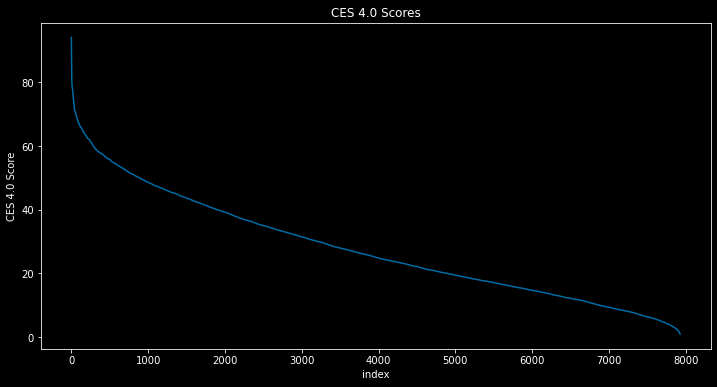

In [228]:
dfca4[col].plot(figsize = (12,6))
plt.title("CES 4.0 Scores")
plt.xlabel("index")
plt.ylabel("CES 4.0 Score")

Text(0, 0.5, 'count')

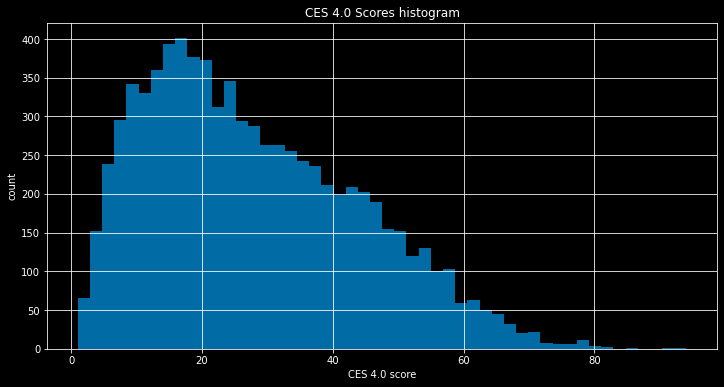

In [229]:
dfca4[col].hist(bins = 50, figsize = (12,6))
plt.title("CES 4.0 Scores histogram")
plt.xlabel("CES 4.0 score")
plt.ylabel("count")

A few NaNs here. It looks like the data set comes sorted by this score. It's also highlighted in the data dictionary. This was really important for this report. Repeating: it's the product of `Pollution Score` and `Population Characteristics Score`, both of which are observed ahead, and are themselves functions of some other measurements.

In [230]:
nan_cols = [] #keep track of columns with NaN values for later.
nan_cols.append('CES 4.0 Score')


## 8 CES 4.0 Percentile

In [231]:
# the percentile column has an extra space. Take it out.
dfca4.rename(columns={' CES 3.0 Percentile':'CES 3.0 Percentile'}, inplace = True)

In [232]:
col = 'CES 3.0 Percentile'
dfca4[col].describe()

count    7929.000000
mean       50.006306
std        28.869355
min         0.010000
25%        25.010000
50%        50.010000
75%        75.000000
max       100.000000
Name: CES 3.0 Percentile, dtype: float64

Text(0, 0.5, 'count')

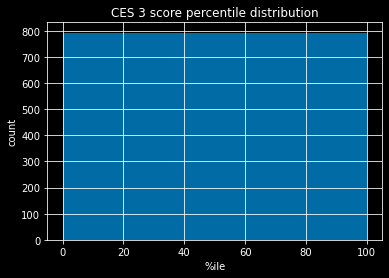

In [233]:
#percentile values: they ought to be evenly spaced, and are!
dfca4[col].hist()
plt.title("CES 3 score percentile distribution")
plt.xlabel("%ile")
plt.ylabel("count")

Same number of nans here, too. Check if they are all for the same observations.

In [234]:
#for each observation, is the isna value for the score the same for the percentile isna?
isna_list = dfca4['CES 3.0 Score'].isna() == dfca4['CES 3.0 Percentile'].isna()
isna_list

0       True
1       True
2       True
3       True
4       True
        ... 
8030    True
8031    True
8032    True
8033    True
8034    True
Length: 8035, dtype: bool

In [235]:
#if they're all true, it'll add up to the size of the list above, 8035.
isna_list.sum()

8035

Yes, all the NaNs for the percentile ranges are the same as those for the score. Let's make sure this is true for the percentile string.

In [236]:
#append to cols with nans
nan_cols.append(col)


## 9 CES 4.0 Percentile Range

In [237]:
dfca4.columns

Index(['Census Tract', 'Total Population', 'California County', 'ZIP',
       'Nearby City \n(to help approximate location only)', 'Longitude',
       'Latitude', 'CES 3.0 Score', 'CES 3.0 Percentile',
       'CES 3.0 \nPercentile Range', 'SB 535 Disadvantaged Community', 'Ozone',
       'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl', 'Diesel PM', 'Diesel PM Pctl',
       'Drinking Water', 'Drinking Water Pctl', 'Pesticides',
       'Pesticides Pctl', 'Tox. Release', 'Tox. Release Pctl', 'Traffic',
       'Traffic Pctl', 'Cleanup Sites', 'Cleanup Sites Pctl',
       'Groundwater Threats', 'Groundwater Threats Pctl', 'Haz. Waste',
       'Haz. Waste Pctl', 'Imp. Water Bodies', 'Imp. Water Bodies Pctl',
       'Solid Waste', 'Solid Waste Pctl', 'Pollution Burden',
       'Pollution Burden Score', 'Pollution Burden Pctl', 'Asthma',
       'Asthma Pctl', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Cardiovascular Disease', 'Cardiovascular Disease Pctl', 'Education',
       'Education Pctl', '

In [238]:
col = 'CES 3.0 \nPercentile Range'
dfca4[col].describe()

count                         7929
unique                          20
top       95-100% (highest scores)
freq                           397
Name: CES 3.0 \nPercentile Range, dtype: object

It looks like this is just a 5%-binned version of `CES 4.0 Percentile Range`. Just check those NaNs anyway.

In [239]:
#for each observation, is the isna value for the percentile range the same for the percentile isna?
isna_list = dfca4['CES 3.0 \nPercentile Range'].isna() == dfca4['CES 3.0 Percentile'].isna()
len(isna_list) == isna_list.sum()

True

Yes, they're all paired up appropriately. I don't think this percentile range will be that useful -- it's a lower resolution version of `CES 4.0 Percentile`.

In [240]:
#add to nan list
nan_cols.append(col)

# 10 Ozone

Here's a key one --- Ozone is short-lived, produced by combustion, and a strong oxidizer. It's a lung / mucous membrane irritant. It will be strange if it isn't linked to some extra pulmonary disease.

These values are **DAILY MAXIMA** over 8 hours. Which 8 hours? Are these taken 8 hours at a time over the entire state? This is a really strange integration range. It's also a strange final number. It would be really nice to have had minima, etc. A station seeing one car drive by all day could potentially have the same value here as one with a consistently high value.

Alternatively, it says they are means over summer months (may through october). This seems very strange --- I would think the 8 hour maxes will be more variable and generally higher than the summer month means. It's strange they're added together. I wonder if this contributes to the 2-peakedness.

The units aren't given explicitly. Ozone near the surface is typically measured in ppbv, so it's likely these numbers are ppmv, parts per million by volume.

In [241]:
#no nans
col = 'Ozone'
dfca4[col].describe()

count    8035.000000
mean        0.047430
std         0.010244
min         0.026000
25%         0.040000
50%         0.046000
75%         0.055000
max         0.068000
Name: Ozone, dtype: float64

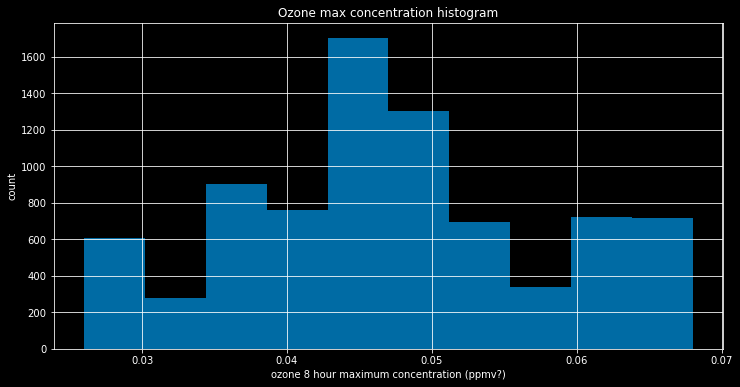

In [242]:
plt.figure(figsize = (12,6))
dfca4[col].hist()
plt.xlabel("ozone 8 hour maximum concentration (ppmv?)")
plt.ylabel("count")
plt.title("Ozone max concentration histogram");

In [243]:
# keep track of pollutants
pollutants = []
pollutants.append(col)

# 11 Ozone Pctl
Ozone percentile.

In [244]:
col = 'Ozone Pctl'
dfca4[col].describe()

count    8035.000000
mean       53.298859
std        28.600669
min         0.240000
25%        25.870000
50%        53.020000
75%        77.870000
max       100.000000
Name: Ozone Pctl, dtype: float64

Text(0, 0.5, 'count')

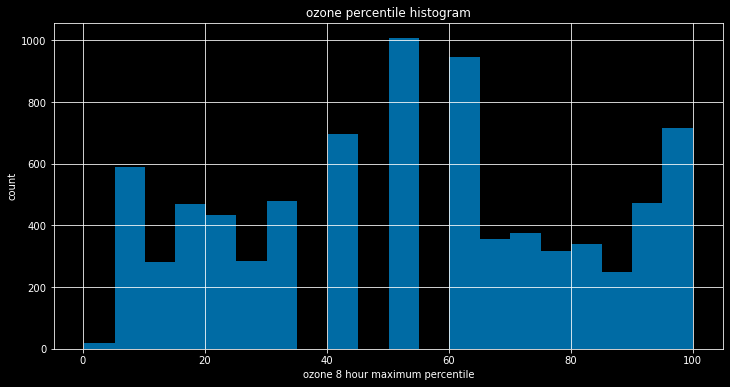

In [245]:
#should be pretty flat, as a percentile
plt.figure(figsize=(12,6))
dfca4[col].hist(bins = 20)
plt.title('ozone percentile histogram')
plt.xlabel('ozone 8 hour maximum percentile')
plt.ylabel('count')

Not exactly even. There are some big jumps in the values even when lined up. This is actually pretty strange.
It could be explained if there are a lot of entries with the same value.

In [246]:
len(dfca4[col].unique())

19

There sure are. This shouldn't be that surprising.

Let's do a Milliken oil-drop experiment on this; find all the differences between successive ozone measurements. If there are only 227 unique values in the set, we're bound to see a value that is only 1 of the smallest distinguishable unit apart from another.

First, let's make sure we've kept track of this column.

In [247]:
#append ozone percentile to pollutants pctiles.
ppcts = []
ppcts.append(col)

### Ozone measurement resolution --- Milliken oil drop

In [248]:
#line up ozone measurements.
ozone_sorted = dfca4['Ozone'].sort_values()
ozone_sorted

6816    0.026
3453    0.026
3769    0.026
7446    0.026
5363    0.026
        ...  
576     0.068
4833    0.068
6161    0.068
5875    0.068
4618    0.068
Name: Ozone, Length: 8035, dtype: float64

Yep. There's something special about those values. My guess is these were measured in some other unit, then converted by some common multiple.

Used the [numpy docs](https://numpy.org/doc/stable/reference/generated/numpy.delete.html) to figure out `ndarray.delete` for dropping zeros.

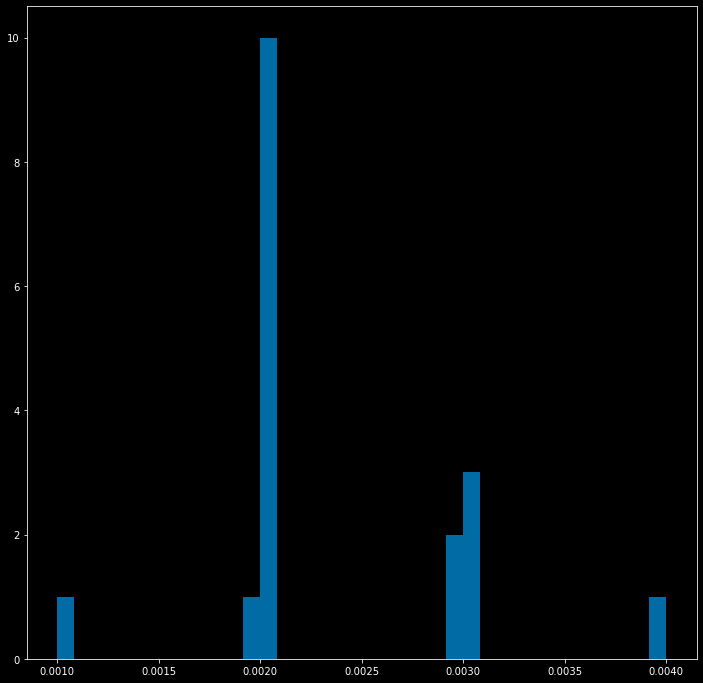

In [249]:
#get successive differences
ozone_diffs = np.diff(ozone_sorted)
ozone_diffs.sort()

#drop all nonzero values
mask = list(map(lambda entry: True if entry != 0 else False, ozone_diffs))
ozone_diffs = ozone_diffs[mask]

#plot histogram.
plt.figure(figsize = (12,12))
plt.hist(ozone_diffs, bins = 2*len(ozone_diffs));

In [250]:
# minimum value is
min_diff = ozone_diffs.min()
min_diff

0.000999999999999994

In [251]:
#are all other values an even multiple of this?
ozone_diffs/min_diff

array([1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3.,
       4.])

Okay. This may not be so important. The values are not all even multiples of the minimum difference. But, the min difference is very close to 3.84. I wonder if there's any weirdness with rounding errors here.

# 12  PM2.5 

Annual mean particles < 2.5 micron size concentration. I'm going to guess that there is a passive collector that is put out for the year, then concentration is derived from this.

Checking the [report](../enviroscreen_info/CAES4/calenviroscreen40reportf2021.pdf): the unit is in micrograms per cubic meter. It was also integrated over 2015 to 2017!! This ought to be the same as for CES 3. I wonder if this is included in 2.0.

It also says these are gathered by two sources: anneal mean concentration from monitor concentrations and satellite observations. Could this contribute to the 2-peakedness? Or is there a mechanism that makes locations have PM concentrations of only certain values? This seems unlikely.

In [252]:
col = 'PM2.5'
dfca4[col].describe()

count    8016.000000
mean       10.377904
std         2.598074
min         1.651081
25%         8.697944
50%        10.370000
75%        12.050000
max        19.600000
Name: PM2.5, dtype: float64

In [253]:
#not a gas, but treat the same way.
pollutants.append(col)

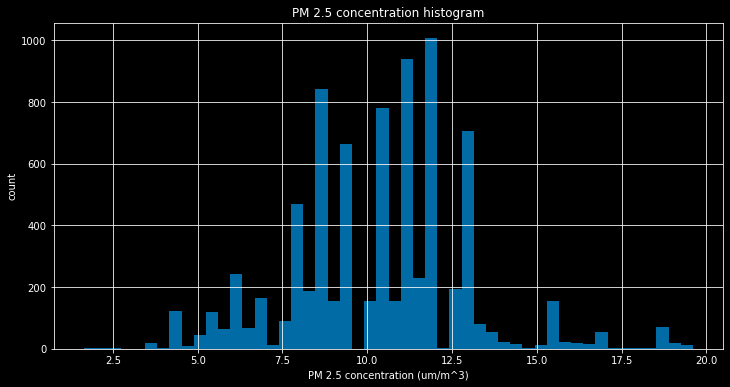

In [254]:
dfca4[col].hist(bins = 50, figsize = (12,6));
plt.xlabel('PM 2.5 concentration (um/m^3)')
plt.ylabel("count")
plt.title("PM 2.5 concentration histogram");

No Peak in 3.0

In [255]:
pollutants.append(col)

# 13 PM 2.5 Pctl
PM 2.5 percentile.

In [256]:
col = 'PM2.5 Pctl'
dfca4[col].describe()

count    8016.000000
mean       53.594875
std        29.370140
min         0.010000
25%        30.700000
50%        52.610000
75%        81.660000
max       100.000000
Name: PM2.5 Pctl, dtype: float64

<AxesSubplot:>

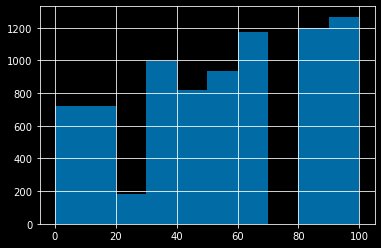

In [257]:
#plot histogram --- should be flat.
dfca4[col].hist()

In [258]:
#append to pollutant percentile list.
ppcts.append(col)

# Diesel PM

These are yearly emissions estimates, in tons/year, NOT a concentration in the air. This is from **2016**, from California Air Resources Board (CARB) model with a 1x1 km grid.
> The data source does not
account for meteorological dispersion of emissions at the
neighborhood scale, which can have local-scale and year-to-year
variability, or significant local-scale spatial gradients known to exist
within a few hundred meters of a high-volume roadway or other
large source of diesel PM.

Most of the high emissions areas are near cities:
![diesel-cali](pix/cali_diesel.png)
![diesel-city-detail](pix/city_diesel.png)
But what's going on in the Mojave desert?
![diesel-mojave](pix/mojave-diesel.png)
![mojave-closeup](pix/mojave_closeup.png)
[google maps](https://www.google.com/maps/@35.4896042,-116.980166,8.71z)

It's Fort Irwin. There are likely plenty of comparable emission sources, but this is the one whose census tract is large. These are total emissions, not normalized for area.

In [259]:
col = 'Diesel PM'
dfca4[col].describe()

count    8035.000000
mean       19.196064
std        16.993880
min         0.021000
25%         8.812000
50%        16.448000
75%        24.646500
max       253.731000
Name: Diesel PM, dtype: float64

Text(0.5, 1.0, 'Diesel PM emissions, tons / yr')

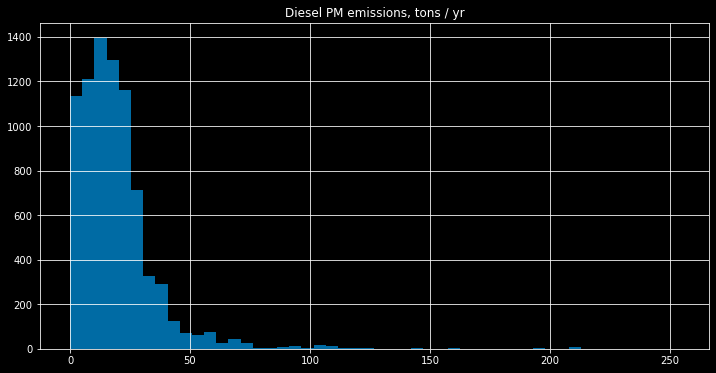

In [260]:
dfca4[col].hist(bins = 50,figsize = (12,6))
plt.title("Diesel PM emissions, tons / yr")

Text(0.5, 1.0, 'Diesel PM emissions, tons / yr')

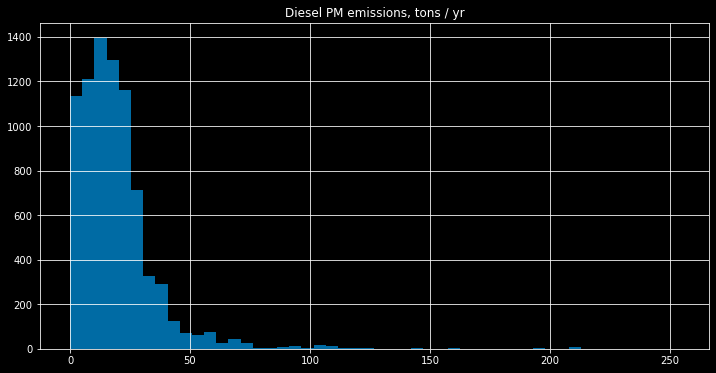

In [261]:
dfca4[col].hist(bins = 50,figsize = (12,6))
plt.title("Diesel PM emissions, tons / yr")

In [262]:
#list the highest Diesel PM emissions
dfca4.sort_values(by = col, ascending = False).head(20)

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,SB 535 Disadvantaged Community,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
4425,6071025000,8850,San Bernardino,92310,Fort Irwin,-116.644250,35.402696,22.49,44.19,40-45%,No,0.057,82.10,6.183105,7.77,253.731,100.00,560.98,59.32,0.00,0.00,0.948759,4.98,NaN,NaN,8.00,55.60,109.85,97.55,0.500,76.85,0,0.00,2.20,52.16,47.05,5.80,64.19,12.39,1.56,4.27,32.63,14.80,97.32,0.8,1.00,2.4,17.53,34.8,52.23,13.7,79.15,7.2,5.12,37.42,3.88,30.84
673,6037575901,3454,Los Angeles,90802,Long Beach,-118.202376,33.772692,52.97,91.51,90-95%,Yes,0.042,31.84,11.210000,66.23,208.400,99.99,220.01,18.37,1.48,42.28,11002.329910,94.61,728.75,52.32,0.40,6.33,28.50,80.37,0.495,74.94,21,99.14,0.25,10.12,56.69,6.98,86.38,83.03,86.70,4.83,47.57,9.28,66.38,29.9,76.39,13.6,71.12,59.4,83.75,12.7,74.37,32.2,91.36,73.14,7.59,84.51
1537,6037576001,4969,Los Angeles,90802,Long Beach,-118.193863,33.763116,43.36,80.62,80-85%,Yes,0.042,31.84,11.210000,66.23,208.400,99.99,251.90,25.45,0.00,0.00,9180.000000,92.50,699.76,49.97,7.25,53.19,14.75,59.43,0.725,83.24,11,89.54,11.00,90.99,59.95,7.38,91.46,83.08,86.72,6.97,90.27,9.29,66.49,4.6,17.85,5.9,41.25,21.8,30.25,4.4,8.69,20.8,62.43,56.63,5.87,59.87
1002,6037576200,6158,Los Angeles,90802,Long Beach,-118.186764,33.772384,48.56,87.36,85-90%,Yes,0.042,31.84,11.210000,66.23,208.400,99.99,220.01,18.37,0.97,38.43,9832.283524,93.40,481.95,28.96,3.00,32.71,6.30,37.01,0.300,69.19,5,55.01,5.50,75.64,53.90,6.64,81.56,73.70,81.06,7.53,94.36,8.09,51.71,27.6,73.80,8.1,51.70,66.9,90.66,5.6,17.29,33.7,93.35,70.54,7.31,80.59
782,6037575902,4762,Los Angeles,90802,Long Beach,-118.195201,33.772316,51.28,90.14,90-95%,Yes,0.042,31.84,11.210000,66.23,208.400,99.99,220.01,18.37,1.70,43.25,10609.017550,94.33,461.27,26.85,2.10,27.62,10.50,50.78,0.235,63.69,21,99.14,1.10,33.25,54.57,6.72,82.92,79.81,85.05,6.59,86.06,8.87,62.00,13.5,48.91,11.5,64.34,58.3,82.58,10.8,61.91,31.0,89.40,73.57,7.63,85.14
2430,6037576601,4399,Los Angeles,90802,Long Beach,-118.179926,33.766566,35.49,69.35,65-70%,No,0.042,31.84,11.210000,66.23,208.400,99.99,252.97,25.52,0.00,0.00,9112.306037,92.38,614.32,43.10,2.00,27.29,0.00,0.00,0.065,28.12,6,63.17,11.00,90.99,48.17,5.93,67.36,83.08,86.72,6.86,89.18,9.29,66.49,5.6,22.23,3.4,25.50,28.0,41.46,6.7,26.31,19.6,57.34,57.68,5.98,61.61
2245,6037576501,3369,Los Angeles,90802,Long Beach,-118.178731,33.772239,36.94,71.69,70-75%,No,0.042,31.84,11.210000,66.23,208.400,99.99,220.01,18.37,0.00,0.00,9479.850320,92.97,669.67,47.68,2.00,27.29,3.00,21.88,0.050,25.76,5,55.01,5.50,75.64,47.71,5.88,66.01,77.98,83.56,4.38,35.41,8.64,58.76,22.3,66.02,8.0,51.09,48.5,71.46,7.8,36.77,28.3,84.49,60.60,6.29,65.87
7933,6037980033,61,Los Angeles,90802,Long Beach,-118.220310,33.744315,NaN,NaN,NaN,Yes,0.042,31.84,11.210000,66.23,197.208,99.91,458.47,47.12,0.00,0.00,8541.428738,91.31,855.64,60.45,78.40,98.54,164.55,99.02,7.675,98.61,29,99.80,13.20,93.30,70.41,8.67,98.77,61.02,70.23,NaN,NaN,6.23,26.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2210,6037576502,4543,Los Angeles,90802,Long Beach,-118.174091,33.771918,37.21,72.13,70-75%,No,0.042,31.84,11.210000,66.23,194.972,99.90,220.01,18.37,0.00,0.00,9393.378946,9

In [263]:
dfca4[col].sort_values(ascending = False)

4425    253.731
673     208.400
1537    208.400
1002    208.400
782     208.400
         ...   
4955      0.043
4898      0.032
6853      0.029
5268      0.028
3311      0.021
Name: Diesel PM, Length: 8035, dtype: float64

There are high emission sources, and then some HUGE emission sources.

In [264]:
#what's this huge one?
dfca4.loc[4268]

Census Tract                                          6037214901
Total Population                                            3083
California County                                    Los Angeles
ZIP                                                        90048
Nearby City \n(to help approximate location only)    Los Angeles
Longitude                                            -118.387238
Latitude                                               34.074281
CES 3.0 Score                                              23.42
CES 3.0 Percentile                                         46.17
CES 3.0 \nPercentile Range                                45-50%
SB 535 Disadvantaged Community                                No
Ozone                                                      0.048
Ozone Pctl                                                 60.88
PM2.5                                                      12.05
PM2.5 Pctl                                                 81.66
Diesel PM                

This is Fort Irwin again. I'm going to assume this is a real value. There's route 15 and a huge military training center. Tanks and helicopters and trucks and cigarettes are all over the place.

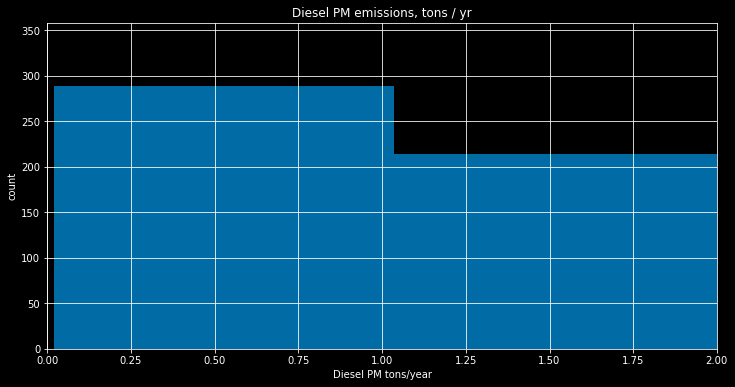

In [265]:
#look at distribution again with the top 3 removed.
dfca4[col].hist(bins = 250,figsize = (12,6))
plt.title("Diesel PM emissions, tons / yr")
plt.xlabel("Diesel PM tons/year")
plt.ylabel("count")
plt.xlim(0,2);

In [266]:
#this is a pollutant in the area, if not a concentration.
pollutants.append(col)

#  15  Diesel PM Pctl

Text(0.5, 1.0, 'Diesel PM emissions percentiles')

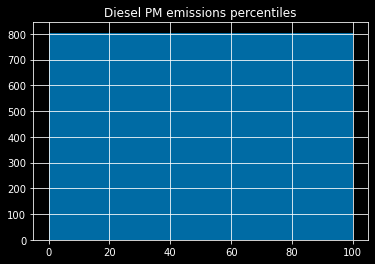

In [267]:
col = 'Diesel PM Pctl'
dfca4[col].hist()
plt.title('Diesel PM emissions percentiles')

Pretty flat. Could be useful in comparing placement with another location, but my guess is these percentiles will be less important than their counterparts measuring a physical value.

# 16  Drinking Water

From the _Water Boundary Tool – Tracking California_ and 8 Groundwater Ambient Monitoring and Assessment (GAMA) projects
> Drinking water contaminant index for selected contaminants (2011
to 2019)

Contaminants include:
- nitrate
- perchlorate
- arsenic
- trihalomethanes (THMs)
- lead
- others:
    - trichloropropane
    - cadmium
    - dibromochloropropane
    - gross alpha
    - chromium, hexavalent
    - ethylene dibromide
    - total haloacetic acids
    - tetrachloroethylene
    - trichloroethylene

In [268]:
col = 'Drinking Water'
dfca4[col].describe()

count    8017.000000
mean      472.372294
std       249.331571
min         6.920000
25%       249.350000
50%       479.230000
75%       664.070000
max      1245.650000
Name: Drinking Water, dtype: float64

Text(0, 0.5, 'count')

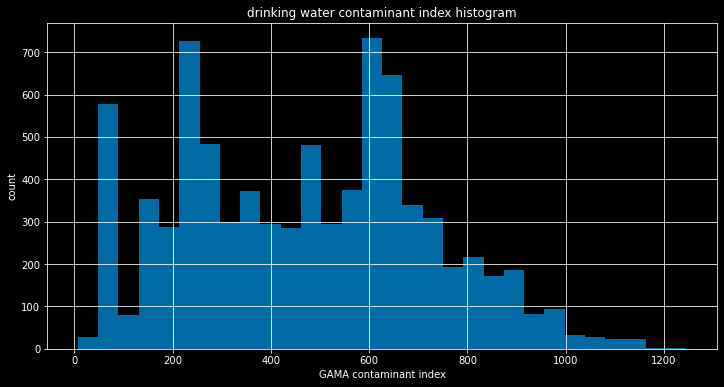

In [269]:
dfca4[col].hist(bins = 30,figsize = (12,6))
plt.title("drinking water contaminant index histogram")
plt.xlabel("GAMA contaminant index")
plt.ylabel('count')

In [270]:
#append to pollutants
pollutants.append(col)

#append to columns with nans
nan_cols.append(col)

# 17 Drinking Water Pctl

In [271]:
col = 'Drinking Water Pctl'
dfca4[col].describe()

count    8017.000000
mean       50.344522
std        28.828364
min         0.010000
25%        25.010000
50%        51.020000
75%        78.570000
max       100.000000
Name: Drinking Water Pctl, dtype: float64

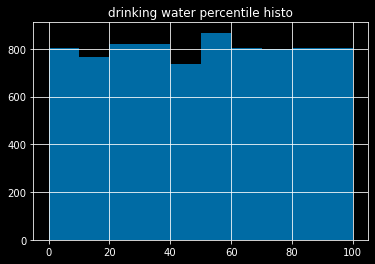

In [272]:
dfca4[col].hist()
plt.title("drinking water percentile histo");

# 18 Lead

>Potential risk for lead exposure in children living in low-income
communities with older housing.
Percentage of households within a census tract with likelihood of
lead-based paint (LBP) hazards from the age of housing (2017
California parcel data and 5-year estimates 2015-2019) combined
with the percentage of households that are both low-income
(household income less than 80% of the county median family
income) and have children under 6 years old (5-year estimates
2013-2017).

```python
lead = [0.6, 0.4] . [ "homes with LBP Hazards Liklihood pctile" , "low-income housholds with children pctile"]
```

In [273]:
# col = 'Lead'
# dfca4[col].describe()

In [274]:
# dfca4[col].hist(bins = 30,figsize = (12,6))
# plt.title("household lead risk percentage per tract")

In [275]:
# #append to pollutants
# pollutants.append(col)

# #append to cols with nans
# nan_cols.append(col)

# 19 Lead Pctl

In [276]:
# col = 'Lead Pctl'
# dfca4['Lead Pctl'].hist()

# 20 Pesticides

pounds per square mile average from 2017 to 2019.

> Total pounds of 132 selected active pesticide ingredients (filtered
for hazard and volatility) used in production-agriculture per square
mile, averaged over three years (2017 to 2019).

>pesticides that did not make the hazard and volatility
criteria, but that are listed as Toxic Air Contaminants (TACs) or
restricted active ingredients based on DPR’s, TAC or restricted use
lists were also included in the analysis.

### Q:
    - is this averaged over time? pounds per square mile per year, or per three years?
    - pounds seems like a lousy measure when volatility, solubility, biological availability, biological impact are all different for each of the 132 pesticides. Are they comparable by weight?
    - Are the heavy users typos or real?

In [277]:
col = "Pesticides"
dfca4[col].describe()

count     8035.000000
mean       313.973556
std       2775.125375
min          0.000000
25%          0.000000
50%          0.000000
75%          0.370000
max      91316.190000
Name: Pesticides, dtype: float64

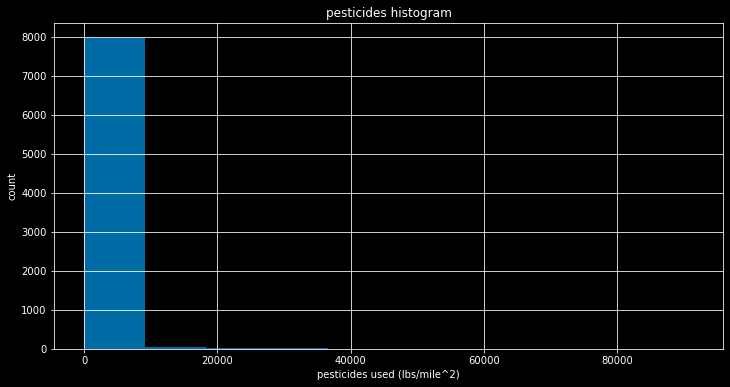

In [278]:
dfca4[col].hist(figsize = (12,6))
plt.title("pesticides histogram")
plt.xlabel("pesticides used (lbs/mile^2)");
plt.ylabel('count');

There's a few big outliers.

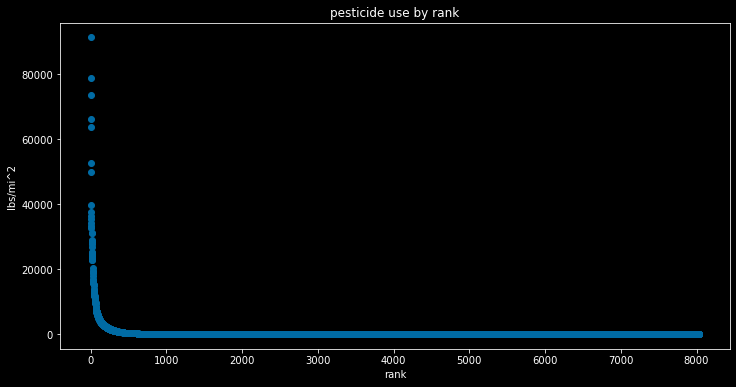

In [279]:
plt.figure(figsize = (12,6))
plt.scatter(np.linspace(0,8035, 8035), dfca4[col].sort_values(ascending = False))
plt.title("pesticide use by rank")
plt.xlabel('rank')
plt.ylabel("lbs/mi^2");

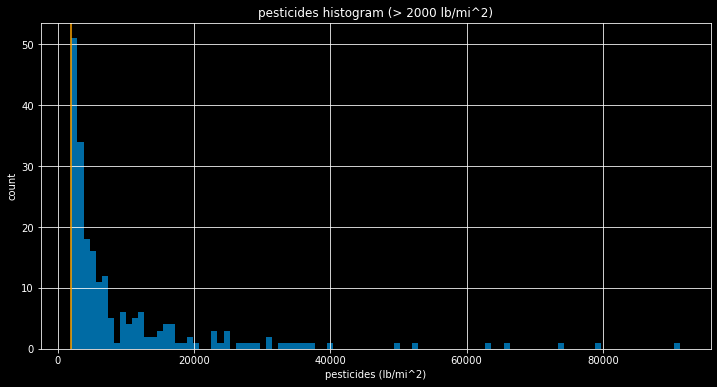

In [280]:
#look at the same plots with zeros removed
dfca4.loc[dfca4[col]>2000,col].hist(bins = 100, figsize = (12,6))
# plt.xlim(0,5000)
plt.title("pesticides histogram (> 2000 lb/mi^2)")
plt.axvline(2000, c='orange')
plt.ylabel("count")
plt.xlabel("pesticides (lb/mi^2)");

In [281]:
#what are these heavy use regions?
dfca4[['Census Tract', 'Total Population', 'California County', 'Latitude', 'Longitude', 'Pesticides']].sort_values(by = col, ascending = False).head(20)

,Census Tract,Total Population,California County,Latitude,Longitude,Pesticides
2514,6111004716,4476,Ventura,34.185963,-119.151143,91316.19
1602,6111004704,1469,Ventura,34.171270,-119.118691,78963.77
2420,6111005002,3003,Ventura,34.232979,-119.137174,73674.67
3508,6111005003,8366,Ventura,34.240782,-119.158383,66308.56
2971,6111001302,1778,Ventura,34.292334,-119.140561,63614.90
1384,6053010101,4518,Monterey,36.863303,-121.781632,52641.13
4239,6083002211,5366,Santa Barbara,34.956917,-120.392863,49879.91
840,6111002905,5478,Ventura,34.209893,-119.231986,39872.76
3740,6083002306,8810,Santa Barbara,34.976953,-120.466219,37686.23
4457,6053010605,4219,Monterey,36.688690,-121.599174,36479.37


In [282]:
deg_width = .5
deg_range = np.array([-deg_width, deg_width])/2
this_observation = dfca4.loc[2156]
this_lats = np.full(2, this_observation['Latitude']) + deg_range
this_lons = np.full(2, this_observation['Longitude']) + deg_range
plot_tracts(this_lats, this_lons)

NameError: name 'plot_tracts' is not defined

In [ ]:
# deg_width = .15
# deg_range = np.array([-deg_width, deg_width])/2
# this_observation = dfca4.loc[2156]
# this_lats = np.full(2, this_observation['Latitude']) + deg_range
# this_lons = np.full(2, this_observation['Longitude']) + deg_range
# plot_tracts(this_lats, this_lons)

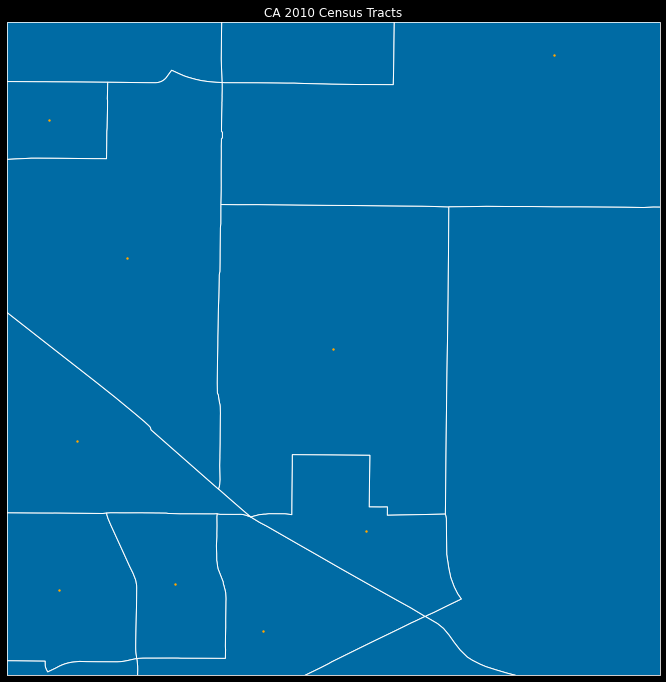

In [ ]:
# deg_width = .05
# deg_range = np.array([-deg_width, deg_width])/2
# this_observation = dfca4.loc[2156]
# this_lats = np.full(2, this_observation['Latitude']) + deg_range
# this_lons = np.full(2, this_observation['Longitude']) + deg_range
# plot_tracts(this_lats, this_lons)

![highest-pesticide-region](pix/highpestoxnard.png)
This extremely high pesticide use area is on the edge of agricultural and city land of Oxnard.

The second highest is the tract just east of it:

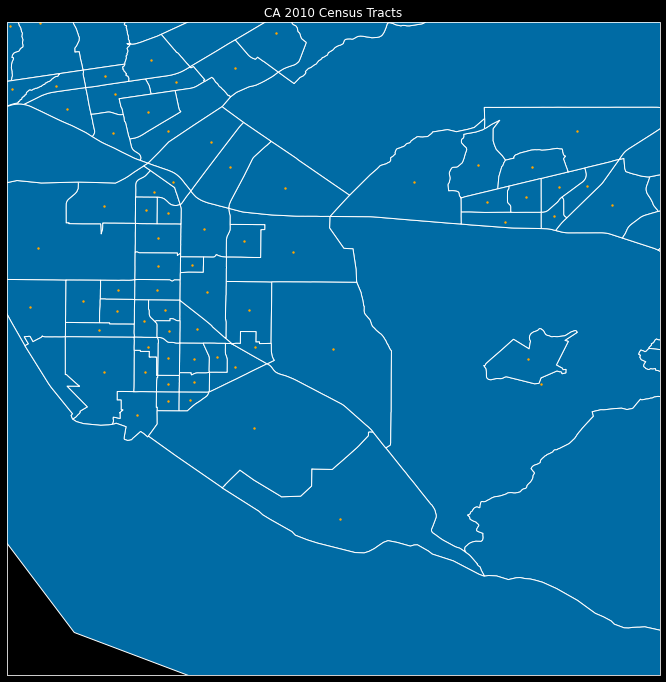

In [ ]:
deg_width = .25
deg_range = np.array([-deg_width, deg_width])/2
this_observation = dfca4.loc[1901]
this_lats = np.full(2, this_observation['Latitude']) + deg_range
this_lons = np.full(2, this_observation['Longitude']) + deg_range
plot_tracts(this_lats, this_lons)

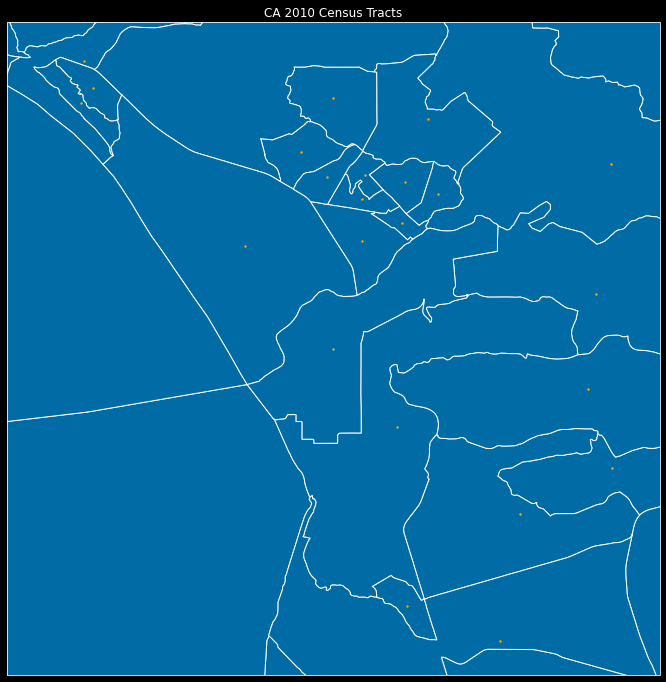

In [ ]:
deg_width = .25
deg_range = np.array([-deg_width, deg_width])/2
this_observation = dfca4.loc[1536]
this_lats = np.full(2, this_observation['Latitude']) + deg_range
this_lons = np.full(2, this_observation['Longitude']) + deg_range
plot_tracts(this_lats, this_lons)

![Montery bay pesticides](pix/montereybaypesticides.png)

The third heaviest pesticide user.

In [ ]:
#add to pollutants
pollutants.append(col)

# 21 Pesticides Pctl

Text(0.5, 1.0, 'pesticides percentile histogram')

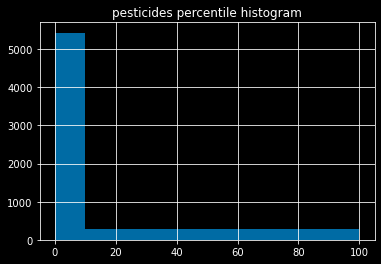

In [ ]:
col = "Pesticides Pctl"
dfca4[col].hist()
plt.title("pesticides percentile histogram")

Another reflection of the extremity of a couple users. These may be typos. Investigate the liklihood of someone using this much pesticide --- maybe it's a value outside of possibility (and therefore a typo).

## 22  Tox. Release 

>Toxicity-weighted concentrations of modeled chemical releases to
air from facility emissions and off-site incineration (averaged over
2017 to 2019 and including releases from Mexican facilities
averaged over 2014 to 2016).

>Toxics Release Inventory (TRI), US Environmental Protection Agency
(US EPA)

>Facilities are required to report if they have 10 or more full-time
employees, operate within a set of industrial sectors outlined by TRI,
and manufacture more than 25,000 pounds or otherwise use more
than 10,000 pounds of any listed chemical during the calendar year.
Lower reporting thresholds apply for PBT chemicals (10 or 100
pounds) and dioxin-like chemicals (0.1 gram).

More on [dioxins from the EPA](https://www.epa.gov/dioxin/learn-about-dioxin):
> Dioxins are formed as a result of combustion processes such as ... burning fuels like wood, coal or oil.

>According to EPA’s 2006 Dioxin Inventory of Sources Report man-made emissions, including backyard and household trash burning, dominated releases in the United States. The report also acknowledges the need for more data on natural sources, such as forest fires, that can form dioxins.

### Q:
- these are toxicity-weighted concentrations. What are the units? They range up to 100,000.

In [ ]:
col = 'Tox. Release'
dfca4[col].describe()

count      8035.000000
mean       3182.713557
std       12556.830160
min           0.000000
25%          94.797220
50%         474.004778
75%        3474.186429
max      842751.329300
Name: Tox. Release, dtype: float64

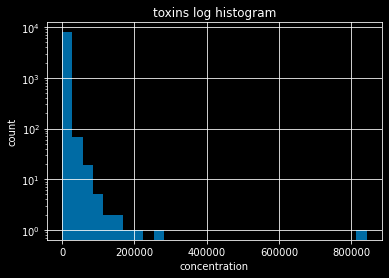

In [ ]:
dfca4[col].hist(bins = 30, log = True)
plt.title("toxins log histogram")
plt.xlabel("concentration")
plt.ylabel("count");

In [ ]:
# add to pollutants
pollutants.append(col)

## 23 Tox. Release Pctl

## 24 Traffic

> Sum of traffic volumes adjusted by road segment length (vehiclekilometers per hour) divided by total road length (kilometers) within
150 meters of the census tract (traffic volumes estimates for 2017).

Units are Vehicle*kilometers per hour / total road length within 150 meters of tract

This is effectively vehicles/hour.

### Q:
- why 150 meters? This is pretty short. I wonder if this is some kind of accounting for city tracts.

In [ ]:
col = 'Traffic'
dfca4[col].describe()

count     7979.000000
mean       943.043646
std        907.358215
min         22.410000
25%        442.075000
50%        699.890000
75%       1190.075000
max      45687.870000
Name: Traffic, dtype: float64

In [ ]:
#add to nans
nan_cols.append(col)

Text(0.5, 1.0, 'traffic histogram')

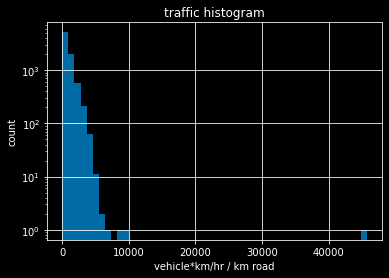

In [ ]:
# look at histogram
dfca4[col].hist(bins = 50, log = True)
plt.xlabel("vehicle*km/hr / km road")
plt.ylabel('count')
plt.title("traffic histogram")

In [ ]:
# there are only two above this level. What are these?
dfca4.sort_values(by = col, ascending = False).head()

,Census Tract,Total Population,California County,ZIP,Nearby City \n(to help approximate location only),Longitude,Latitude,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 \nPercentile Range,SB 535 Disadvantaged Community,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
2700,6073010109,4595,San Diego,92154,San Diego,-117.088418,32.549488,33.53,65.95,65-70%,No,0.035,16.94,14.15,94.96,5.054,13.91,173.47,13.12,0.73,36.22,585.585260,53.23,45687.87,100.00,10.00,62.81,9.00,46.01,0.100,43.11,23,99.54,3.00,61.92,52.17,6.43,77.57,39.44,40.93,5.09,54.72,6.02,24.20,26.7,72.50,10.1,59.38,29.5,44.02,10.5,59.88,22.2,67.68,50.32,5.22,50.60
1839,6073010009,6693,San Diego,92173,San Ysidro,-117.052879,32.547376,40.54,76.81,75-80%,Yes,0.035,16.94,14.99,95.27,13.385,40.41,228.07,22.24,8.60,57.24,774.761509,57.28,9480.17,99.99,0.00,0.00,3.50,23.60,0.100,43.11,14,94.41,0.00,0.00,47.82,5.89,66.43,52.26,59.29,4.07,27.80,8.35,55.25,44.5,90.66,20.8,85.63,63.8,87.94,15.9,87.38,24.3,74.73,66.36,6.88,74.80
3454,6073010015,2803,San Diego,92154,San Diego,-116.953060,32.560142,28.20,56.44,55-60%,No,0.035,16.94,14.99,95.27,21.873,66.82,321.92,34.34,0.00,1.52,2996.936137,73.27,8514.68,99.97,16.00,78.77,31.00,82.51,5.450,97.16,14,94.41,6.00,78.52,65.72,8.10,96.69,35.70,34.80,3.39,14.79,5.56,18.40,24.5,69.40,10.0,59.10,26.8,39.28,5.9,20.10,14.9,34.69,33.59,3.48,24.72
2872,6059074407,6700,Orange,92705,Santa Ana,-117.842203,33.737884,32.39,63.78,60-65%,No,0.046,53.02,10.37,52.61,29.639,84.74,429.03,44.41,0.00,0.00,54509.945820,99.59,6737.30,99.96,15.80,78.13,5.75,33.85,0.375,72.12,0,0.00,5.00,73.54,58.54,7.21,89.42,22.74,11.94,3.22,11.82,3.95,4.36,43.9,90.17,20.2,84.60,70.1,93.01,6.8,27.25,32.1,91.18,43.31,4.49,39.71
2821,6059074408,5399,Orange,92780,Tustin,-117.836640,33.737715,32.75,64.42,60-65%,No,0.048,60.88,10.37,52.61,29.537,84.52,356.83,37.32,0.00,0.00,57504.077710,99.64,6125.69,99.95,3.65,35.43,2.00,13.52,0.085,31.73,0,0.00,1.25,36.52,49.23,6.06,70.55,31.15,27.28,4.29,33.12,6.09,25.15,42.0,88.72,15.5,75.67,56.9,81.22,8.2,40.51,32.7,92.09,52.08,5.40,53.03


Not too surprised by any of these. They may very well be real highways.

# 25 Traffic Pctl

# 26 Cleanup Sites 

This is a number of weighted "EnviroStor" sites. There is a metric to the weight (0 -- 12)based on distance from populated areas.

In [ ]:
col = 'Cleanup Sites'
dfca4[col].describe()

count    8035.000000
mean        8.370541
std        16.532104
min         0.000000
25%         0.000000
50%         2.000000
75%        10.300000
max       323.750000
Name: Cleanup Sites, dtype: float64

Text(0, 0.5, 'tract count')

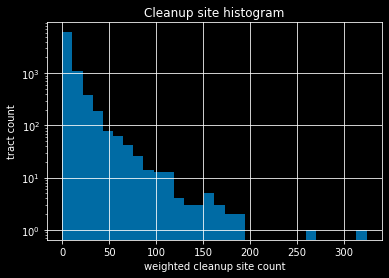

In [ ]:
dfca4[col].hist(bins = 30, log = True)
plt.title("Cleanup site histogram")
plt.xlabel("weighted cleanup site count")
plt.ylabel("tract count")

# 27 Cleanup Sites Pctl

# 28  Groundwater Threats

In [ ]:
col = 'Groundwater Threats'
dfca4[col].describe()

count    8035.000000
mean       15.700759
std        36.354482
min         0.000000
25%         0.200000
50%         5.600000
75%        17.800000
max      1610.250000
Name: Groundwater Threats, dtype: float64

Text(0, 0.5, 'count')

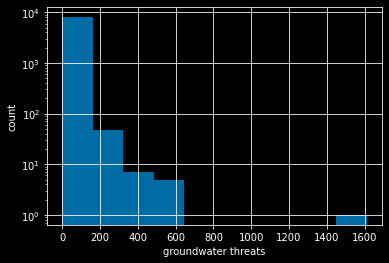

In [ ]:
dfca4[col].hist(log = True)
plt.xlabel('groundwater threats')
plt.ylabel('count')

In [ ]:
# 29 Groundwater pct

# 30 Haz. Waste

>Sum of weighted permitted hazardous waste facilities, hazardous
waste generators, and chrome plating facilities within each census
tract. 

In [ ]:
col = 'Haz. Waste'
dfca4[col].describe()

count    8035.000000
mean        0.453356
std         1.470877
min         0.000000
25%         0.000000
50%         0.050000
75%         0.225000
max        28.695000
Name: Haz. Waste, dtype: float64

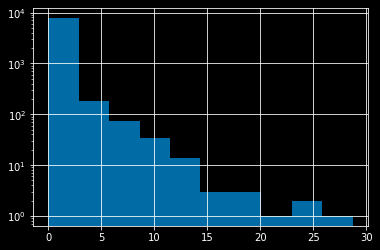

In [ ]:
dfca4[col].hist(log = True);

In [ ]:
# 31 haz waste pct

#  32  Imp. Water Bodies

Impaired water bodies

> Summed number of pollutants across all water bodies designated
as impaired within the area (2018).

In [ ]:
col = "Imp. Water Bodies"
dfca4[col].describe()

count    8035.000000
mean        3.279029
std         4.516895
min         0.000000
25%         0.000000
50%         1.000000
75%         6.000000
max        34.000000
Name: Imp. Water Bodies, dtype: float64

Text(0, 0.5, 'count')

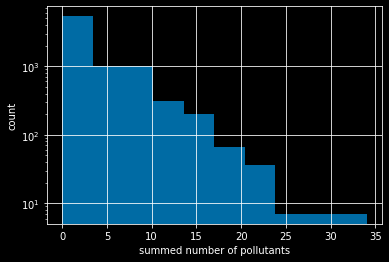

In [ ]:
dfca4[col].hist(log = True)
plt.xlabel("summed number of pollutants")
plt.ylabel("count")

In [ ]:
pollutants.append(col)

# 33 imp water pctl

# 34 Solid Waste

> Sum of weighted solid waste sites and facilities
(as of July 2021).

Weights are similar to the cleanup site weights

In [ ]:
col = 'Solid Waste'
dfca4[col].describe()

count    8035.000000
mean        2.232738
std         4.706866
min         0.000000
25%         0.000000
50%         0.200000
75%         2.250000
max        97.800000
Name: Solid Waste, dtype: float64

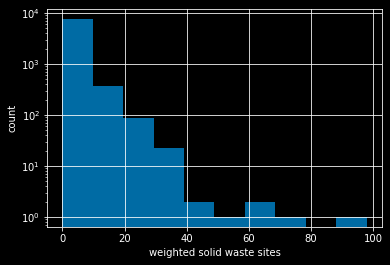

In [ ]:
dfca4[col].hist(log = True);
plt.xlabel('weighted solid waste sites')
plt.ylabel("count");

In [ ]:
pollutants.append(col)

# 35 Solid Waste Pctl

# 36 Pollution Burden   

>Pollution Burden scores for each census tract are derived from the average percentiles of
the seven Exposures indicators (ozone and PM2.5 concentrations, diesel PM emissions,
drinking water contaminants, children’s lead risk from housing, pesticide use, toxic releases
from facilities, and traffic density) and the five Environmental Effects indicators (cleanup
sites, impaired water bodies, groundwater threats, hazardous waste facilities and
generators, and solid waste sites and facilities).

>Indicators from the Environmental Effects component were given half the weight of the
indicators from the Exposures component. The calculated average pollution burden score
(average of the indicators) was divided by 10 and rounded to one decimal place for a
Pollution Burden score ranging from 0.1 – 10. 

### Q:
The range of values is here given to be 0.1 to 10, but the range in the data is 4 to 82. Are these percentiles?

In [ ]:
col = 'Pollution Burden'
dfca4[col].describe()

count    8035.000000
mean       41.965360
std        12.781356
min         8.370000
25%        32.240000
50%        41.800000
75%        51.015000
max        81.190000
Name: Pollution Burden, dtype: float64

# 37 Pollution Burden Score

ok. These are the actual scores.

In [ ]:
col = "Pollution Burden Score"
dfca4[col].describe()

count    8035.000000
mean        5.169018
std         1.574266
min         1.030000
25%         3.970000
50%         5.150000
75%         6.280000
max        10.000000
Name: Pollution Burden Score, dtype: float64

Text(0, 0.5, 'count')

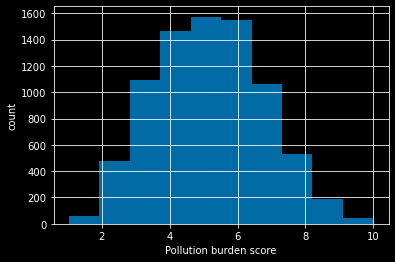

In [ ]:
dfca4[col].hist()
plt.xlabel("Pollution burden score")
plt.ylabel("count")

## 38 Pollution Burden Pctl

# 39 Asthma

> Spatially modeled, age-adjusted rate of ED visits for asthma per
10,000 (averaged over 2015-2017).


In [ ]:
col = 'Asthma'
dfca4[col].describe()

count    8035.000000
mean       51.977813
std        30.552249
min         0.000000
25%        29.855000
50%        45.270000
75%        65.990000
max       278.830000
Name: Asthma, dtype: float64

In [ ]:
nan_cols.append(col)

Text(0, 0.5, 'count')

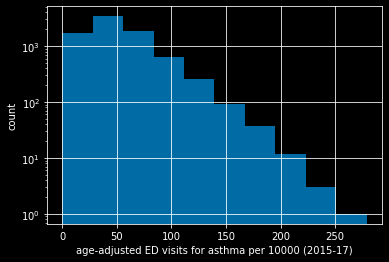

In [ ]:
dfca4[col].hist(log = True)
plt.xlabel("age-adjusted ED visits for asthma per 10000 (2015-17)")
plt.ylabel('count')

In [ ]:
# 40 asthma pctl

# 41 Low Birth Weight   

In [ ]:
col = 'Low Birth Weight'
dfca4[col].describe()

count    7813.000000
mean        4.976329
std         1.551352
min         0.000000
25%         3.950000
50%         4.920000
75%         5.930000
max        14.890000
Name: Low Birth Weight, dtype: float64

In [ ]:
nan_cols.append(col)

Text(0, 0.5, 'count')

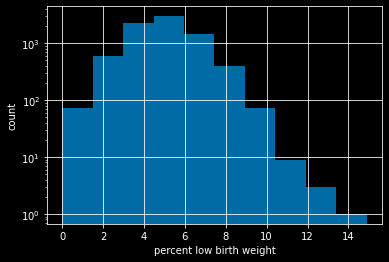

In [ ]:
dfca4[col].hist(log = True)
plt.xlabel("percent low birth weight")
plt.ylabel('count')

In [ ]:
#42 low birth pctl

# 43 Cardiovascular Disease

> Age-adjusted rate of emergency department visits for heart attacks per 10,000

In [ ]:
col = "Cardiovascular Disease"
dfca4[col].describe()

count    8035.000000
mean        8.265890
std         2.971099
min         0.000000
25%         6.080000
50%         7.940000
75%        10.040000
max        21.260000
Name: Cardiovascular Disease, dtype: float64

In [ ]:
nan_cols.append(col)

Text(0, 0.5, 'count')

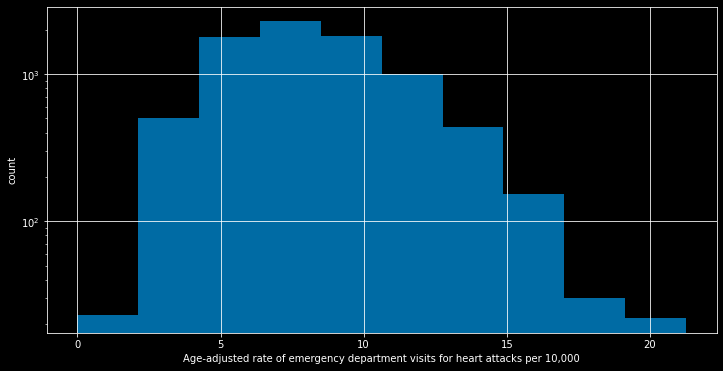

In [ ]:
dfca4[col].hist(log = True, figsize = (12,6)),
plt.xlabel("Age-adjusted rate of emergency department visits for heart attacks per 10,000")
plt.ylabel("count")

In [ ]:
#44 cardiovascular disease pctl

# 45 Education

>Percentage of the population over age 25 with less than a high
school education (5-year estimate, 2015-2019).

In [ ]:
col = "Education"
dfca4[col].describe()

count    7939.000000
mean       19.121779
std        15.952094
min         0.000000
25%         6.300000
50%        14.000000
75%        28.700000
max        80.000000
Name: Education, dtype: float64

In [ ]:
nan_cols.append(col)

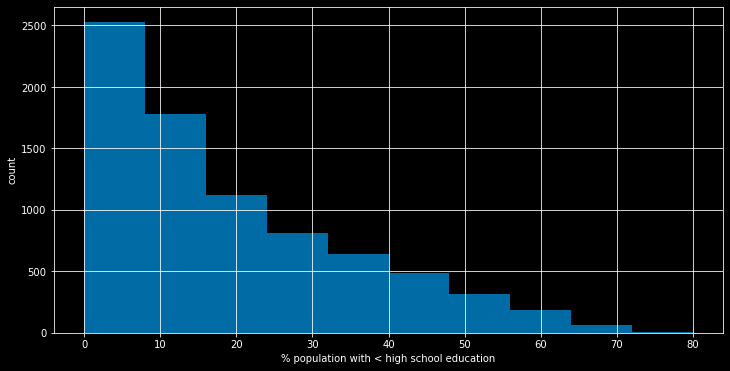

In [ ]:
dfca4[col].hist(figsize = (12,6))
plt.xlabel("% population with < high school education")
plt.ylabel("count");


In [ ]:
# 46 education pctl

# 47  Linguistic Isolation

>Indicator Percentage of limited English-speaking households, (2015-2019).

>The US Census Bureau uses the term
“linguistic isolation” to measure households where all members 14 years of age or above
have at least some difficulty speaking English. A high degree of linguistic isolation among
members of a community raises concerns about access to health information and public
services, and effective engagement with regulatory processes. Information on language
use is collected annually in the ACS. In contrast to the decennial census, the ACS surveys
a small sample of the US population to estimate more detailed economic and social
information for the country’s population.


In [ ]:
col = "Linguistic Isolation"
dfca4[col].describe()

count    7793.000000
mean       10.417862
std         9.982732
min         0.000000
25%         3.000000
50%         7.400000
75%        14.900000
max        72.300000
Name: Linguistic Isolation, dtype: float64

In [ ]:
nan_cols.append(col)

Text(0, 0.5, 'count')

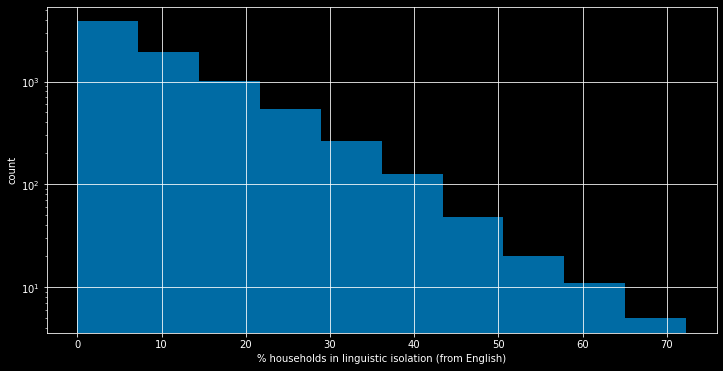

In [ ]:
dfca4[col].hist(log = True, figsize = (12,6));
plt.xlabel("% households in linguistic isolation (from English)")
plt.ylabel("count")

In [ ]:
# 48 linguistic isolation pctl

# 49 Poverty  

> Percent of the population living below **two times** the federal poverty
level (5-year estimate, 2015-2019).


In [ ]:
col = "Poverty"
dfca4[col].describe()

count    7956.000000
mean       36.386790
std        20.316885
min         0.000000
25%        19.200000
50%        33.500000
75%        51.500000
max        96.200000
Name: Poverty, dtype: float64

In [ ]:
nan_cols.append(col)

Text(0, 0.5, 'count')

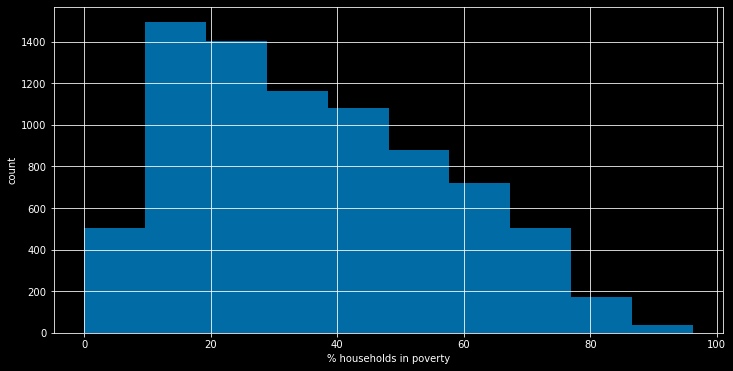

In [ ]:
dfca4[col].hist(figsize = (12,6))
plt.xlabel('% households in poverty')
plt.ylabel('count')

In [ ]:
#50 poverty pctl

# 51  Unemployment 

> Percentage of the population over the age of 16 that is unemployed
and eligible for the labor force. Excludes retirees, students,
homemakers, institutionalized persons except prisoners, those not
looking for work, and military personnel on active duty (5-year
estimate, 2015-2019).

In [ ]:
col = "Unemployment"
dfca4[col].describe()

count    7880.000000
mean       10.214327
std         5.136715
min         0.000000
25%         6.600000
50%         9.300000
75%        12.900000
max       100.000000
Name: Unemployment, dtype: float64

In [ ]:
nan_cols.append(col)

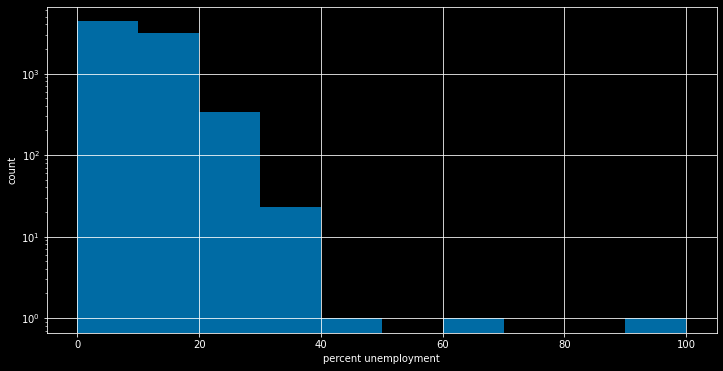

In [ ]:
dfca4[col].hist(log = True, figsize = (12,6))
plt.xlabel("percent unemployment")
plt.ylabel("count");

In [ ]:
# 52 unemployment 

# 53  Housing Burden

>Housing-Burdened Low-Income Households. Percent of households
in a census tract that are both low income (making less than 80% of
the HUD Area Median Family Income) and severely burdened by
housing costs (paying greater than 50% of their income to housing
costs). (5-year estimates, 2013-2017).

This is surely collinear with poverty --- this division captures impoverished homes from the lowest incomes up.


In [ ]:
col = 'Housing Burden'
dfca4[col].describe()

count    7878.000000
mean       19.327913
std         8.734286
min         1.000000
25%        12.900000
50%        18.000000
75%        24.400000
max        67.200000
Name: Housing Burden, dtype: float64

In [ ]:
nan_cols.append(col)

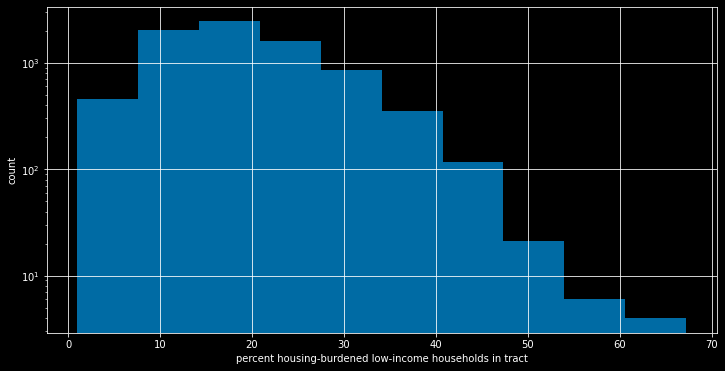

In [ ]:
dfca4[col].hist(log = True, figsize=(12,6))
plt.xlabel("percent housing-burdened low-income households in tract")
plt.ylabel("count");

In [ ]:
# 54 housing burden pctl

# 55  Pop. Char.

In [ ]:
col = 'Pop. Char. '
dfca4[col].describe()

count    7932.000000
mean       49.854979
std        20.571240
min         3.241201
25%        33.463118
50%        49.815416
75%        66.420609
max        96.401800
Name: Pop. Char. , dtype: float64

In [ ]:
nan_cols.append(col)

Text(0.5, 0, 'pop char')

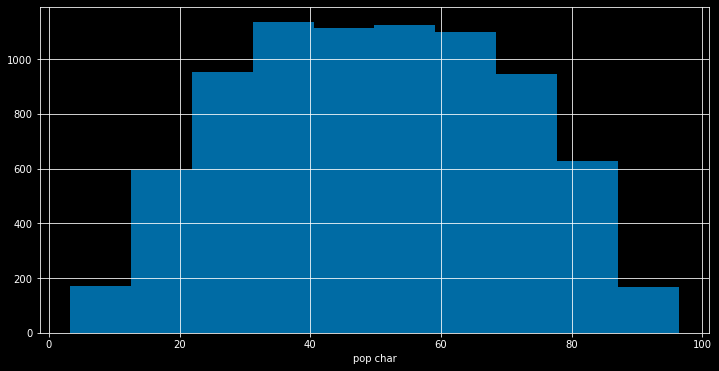

In [ ]:
dfca4[col].hist(figsize = (12,6))
plt.xlabel('pop char')

# 56 Pop. Char. Score

In [ ]:
col = 'Pop. Char. Score'
dfca4[col].describe()

count    7932.000000
mean        5.171582
std         2.133906
min         0.336218
25%         3.471213
50%         5.167478
75%         6.889976
max        10.000000
Name: Pop. Char. Score, dtype: float64

In [ ]:
nan_cols.append(col)

Text(0, 0.5, 'count')

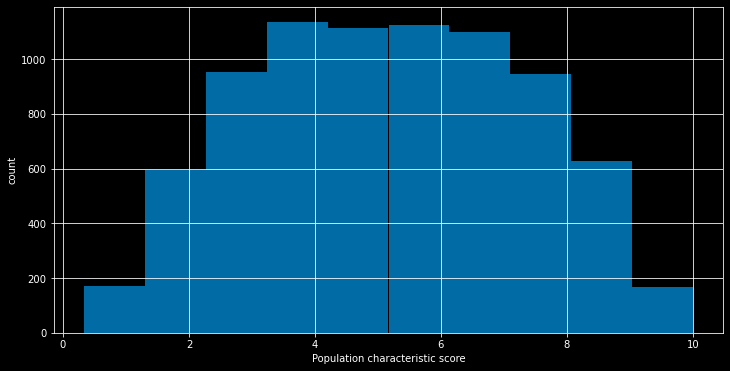

In [ ]:
dfca4[col].hist(figsize = (12,6))
plt.xlabel("Population characteristic score")
plt.ylabel('count')

[Column list](#Column-list)

# NaN value columns

These don't include some of the percentile / duplicate columns.

A good choice for many of these is to replace nans with median values.

In [ ]:
nan_cols

['CES 4.0 Score',
 'CES 4.0 Percentile',
 'CES 4.0 Percentile Range',
 'Drinking Water',
 'Lead',
 'Traffic',
 'Traffic',
 'Asthma',
 'Low Birth Weight',
 'Cardiovascular Disease',
 'Education',
 'Linguistic Isolation',
 'Poverty',
 'Unemployment',
 'Housing Burden',
 'Pop. Char. ',
 'Pop. Char. Score']

In [ ]:
# with scores
# number_cols = [
#  'Total Population',
#  'Longitude',
#  'Latitude',
#  'CES 4.0 Score',
#  'Ozone',
#  'PM2.5',
#  'Diesel PM',
#  'Drinking Water',
#  'Lead',
#  'Pesticides',
#  'Tox. Release',
#  'Traffic',
#  'Cleanup Sites',
#  'Groundwater Threats',
#  'Haz. Waste',
#  'Imp. Water Bodies',
#  'Solid Waste',
#  'Pollution Burden Score',
#  'Asthma',
#  'Low Birth Weight',
#  'Cardiovascular Disease',
#  'Education',
#  'Linguistic Isolation',
#  'Poverty',
#  'Unemployment',
#  'Housing Burden',
#  'Pop. Char. Score']


#without scores
number_cols = [
 'Total Population',
 'Longitude',
 'Latitude',
 'Ozone',
 'PM2.5',
 'Diesel PM',
 'Drinking Water',
 'Lead',
 'Pesticides',
 'Tox. Release',
 'Traffic',
 'Cleanup Sites',
 'Groundwater Threats',
 'Haz. Waste',
 'Imp. Water Bodies',
 'Solid Waste',
 'Asthma',
 'Low Birth Weight',
 'Cardiovascular Disease',
 'Education',
 'Linguistic Isolation',
 'Poverty',
 'Unemployment',
 'Housing Burden']


# Correlations

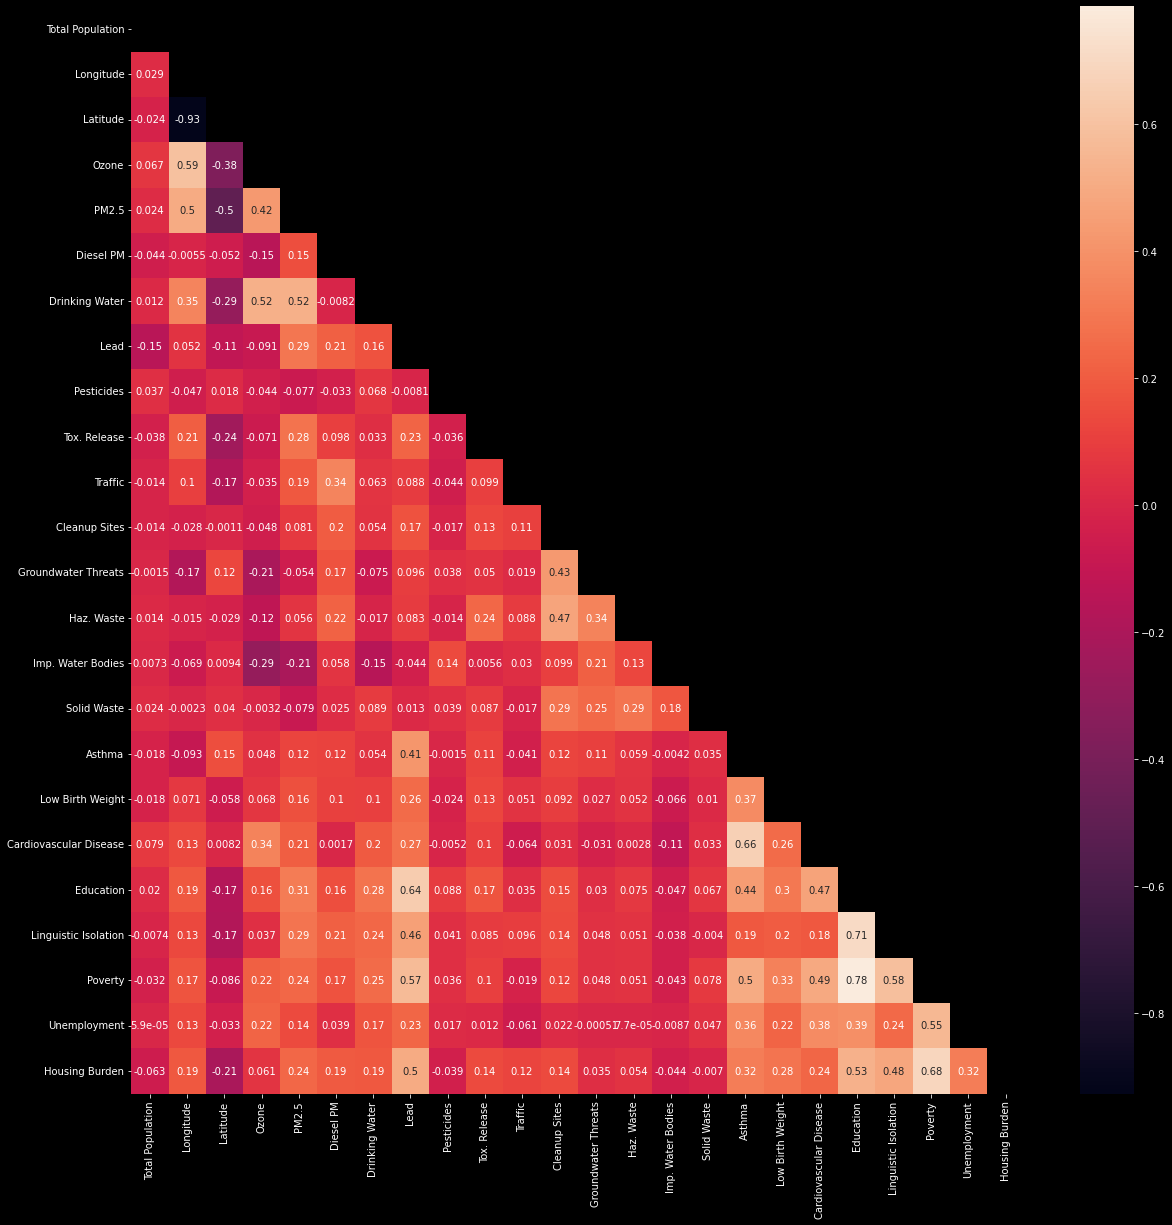

In [ ]:
corr = dfca4[number_cols].corr()
plt.figure(figsize = (20,20))
my_mask = np.zeros_like(corr)
my_mask[np.triu_indices_from(my_mask)] = True
sns.heatmap(corr, annot = True, mask = my_mask);

Latitude and longitude are correlated because California is a \  shaped state.

A lot of the others come together -- poverty, housing burden, education, linguistic isolation, disease and exposure to pollutants.

Correlations between these values and lat/lon are probably due to regions, geography affecting poverty / other socioeconomic factors rather than fundamentally depending on north-south / east-west

# A quick and dirty regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

dfca4_dropna = dfca4.dropna()

lr = LinearRegression()

X = dfca4_dropna[number_cols].drop(columns = ['Asthma','Cardiovascular Disease', 'Low Birth Weight'])
asthma = dfca4_dropna['Asthma']
cvd = dfca4_dropna['Cardiovascular Disease']
lbw = dfca4_dropna['Low Birth Weight']

Xa_train, Xa_test, asthma_train, asthma_test = train_test_split(X, asthma, random_state=0)
lr.fit(Xa_train, asthma_train)
lr.score(Xa_train, asthma_train), lr.score(Xa_test, asthma_test)

(0.40513711121787266, 0.40285618809308166)